# Training MobileNet models

For mobilenets v1

In [1]:
import torch

from mobilenet_v1 import DepthwiseSeparableConv

In [ ]:
x = torch.randn(1, 3, 224, 224)

c1 = torch.nn.Conv2d(3, 32, 3, stride=2, padding=1)
x = c1(x)
dsc = DepthwiseSeparableConv(32, 32)
out = dsc(x)

print(out)
print(out.size())

In [39]:
from mobilenet_v1 import MobileNetV1

model = MobileNetV1(width_multiplier=0.85)
x = torch.randn(4, 3, 224, 224)
out = model(x)
print(out.size())


torch.Size([4, 1000])


# Train MobileNetV1 on CIFAR10

## Data

In [57]:
import torchvision
from torchvision import transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

dataset = torchvision.datasets.CIFAR10("./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
dataloaders = {
    'train': trainloader,
    'val': testloader
}
dataset_sizes = {
    'train': len(dataset),
    'val': len(testset)
}


Files already downloaded and verified
Files already downloaded and verified


torch.Size([4, 3, 32, 32])
  cat  frog truck horse


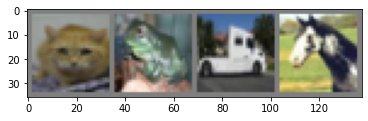

In [46]:
# Show a random sample from the dataset
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
plt.show()

## Network

In [48]:
from mobilenet_v1 import MobileNetV1

model = MobileNetV1()
print(model)

MobileNetV1(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): DepthwiseSeparableConv(
      (depth_conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same, groups=32)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (point_conv): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (2): DepthwiseSeparableConv(
      (depth_conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU()
      (point_conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU()
    )
    (3): Depthwis

## Training Options

In [55]:
import torch.optim as optim
from torch.optim import lr_scheduler
from train_utills import train_model

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [59]:
trained_model = train_model(model, criterion, optimizer, dataloaders, dataset_sizes, 25) #exp_lr_scheduler

Epoch 0/24
----------


KeyboardInterrupt: 